In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import seaborn as sns
import sklearn
sns.set()

In [79]:
data = pd.read_csv('C:/Users/HP/Downloads/1.01.+Simple+linear+regression.csv')
data.head(5)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [32]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


### We will create a linear regression which predicts GPA based on the SAT score obtained

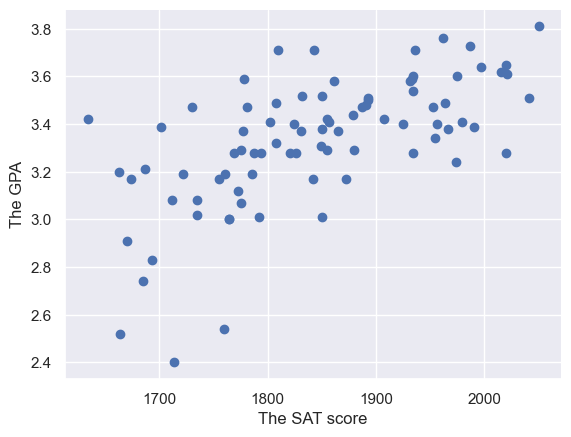

In [33]:
y = data['GPA']
x1 = data['SAT']
# To see if there exists a relation between the two we gonna make a scatter plot because the data is 
# numerical and we are taking two variable
plt.scatter(x1 , y)
plt.xlabel('The SAT score')
plt.ylabel('The GPA')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#### This constant x0 allows the model to account for the intercept term, which represents the value of the dependent variable when all independent variables are zero.

In [81]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           7.20e-11
Time:                        04:06:26   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 1. The lower the standard error the lower is the error in prediction i.e it tells the accuracy of prediction
#### 2. The hypothesis involed is the coefficient equals to 0
#### 3. As the value for the p value of const is 0.503 that is greater then 0.05 significance it shows that the             null hypothesis is not rejectable as it should be less than the significance to get rejected 
#### 4. The p value for the beta 1 is 0.000 that is the most ideal case that rejects the possibility of beta 1 to              be 0 in any case

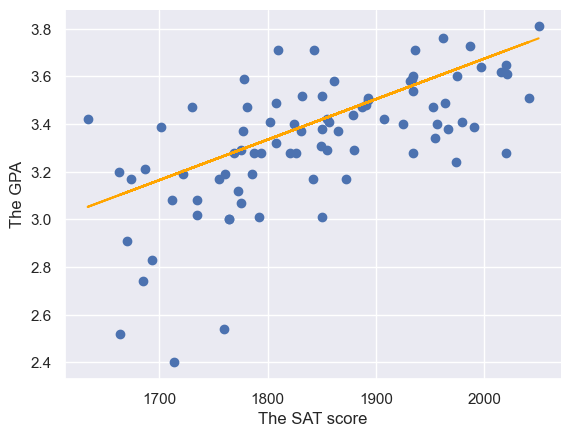

In [66]:
result.params[1] # Beta 1 the slope coefficient
result.params[0] # Beta 0 the constant
regression_line = 0.2750 + 0.0017 * x1 # y = b0 + b1 * x1

plt.scatter(x1, y)
plt.plot(x1, regression_line, color = 'orange', label = 'Regression Line')
plt.xlabel('The SAT score')
plt.ylabel('The GPA')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


### Let's predict the gpa for a user entered value

In [89]:
def gpa_predictor(a):
    if a < 2191:
        predicted_value = 0.2750 + 0.0017 * a
        return predicted_value
    else:
        return 0

value = int(input("Enter a SAT score to predict gpa: "))
print('The predicted GPA is: {0}'.format(round(gpa_predictor(value), 2)))

Enter a SAT score to predict gpa: 2191
The predicted GPA is: 0
